In [11]:
## data load ##

from sklearn.datasets import load_iris
iris = load_iris()

# 입력 데이터와 정답 데이터
x_org, y_org = iris.data, iris.target

# 결과 확인
print('원본 데이터', x_org.shape, y_org.shape)

# 데이터 추출 
x_select = x_org[:,[0,2]]
print(f'추출한 데이터 : {x_select.shape}, {y_org.shape}')

원본 데이터 (150, 4) (150,)
추출한 데이터 : (150, 2), (150,)


In [6]:
## data split ##

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_select, y_org, train_size=75, test_size=75, random_state=123
)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 2) (75, 2) (75,) (75,)


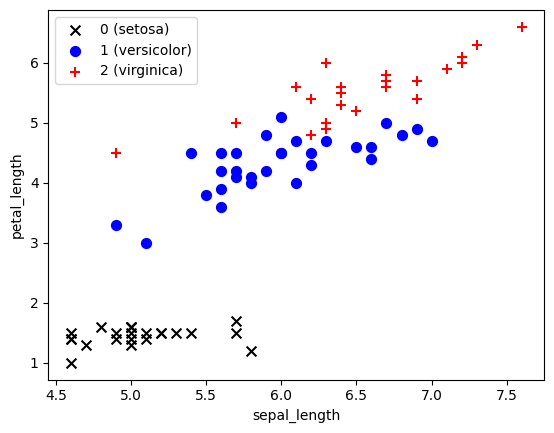

In [14]:
# 데이터를 정답별로 분류 
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

# 시각화 
import matplotlib.pyplot as plt

plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='b', s=50, label='1 (versicolor)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='+', c='r', s=50, label='2 (virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

In [43]:
# input/output dimension

n_input = x_train.shape[1]
n_output = len(list(set(y_train)))

print(f'n_input: {n_input} n_output: {n_output}')

n_input: 2 n_output: 3


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim 
from torchinfo import summary
from torchviz import make_dot

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)
    
    def forward(self, x):
        x1 = self.l1(x)
        return x1

net = Net(n_input, n_output)


In [68]:
# 모델 내부 파라미터 확인 

for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([1., 1., 1.], requires_grad=True))


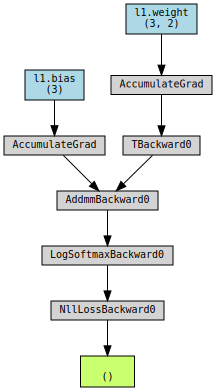

In [69]:
# 손실 함수 : 교차 엔트로피 함수 

criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer=optim.SGD(net.parameters(), lr=lr)

# input/output data -> tensor

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long() # *** float 이 아닌 long 사용 *** 

# validation data -> tensor

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long() # *** float 이 아닌 long 사용 *** 

# 예측 계산
outputs = net(inputs)
# 손실 계산
loss = criterion(outputs, labels)
# 손실의 계산 그래프 시각화 
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)



In [72]:
# 예측 라벨 

print(torch.max(outputs, 1)) # torch.max -> 최댓값과 인덱스값이 둘 다 나옴 

print('\n')

print(torch.max(outputs, 1)[1]) # 인덱스만 

torch.return_types.max(
values=tensor([12.0000, 12.7000,  7.6000, 13.0000, 12.3000,  7.6000,  7.3000, 11.1000,
        12.1000, 13.3000,  8.0000,  7.0000, 10.3000,  7.6000, 11.7000, 13.3000,
         7.4000, 13.5000,  8.2000,  8.4000, 12.7000,  6.6000,  7.9000, 12.2000,
        14.6000, 12.0000, 10.2000, 10.5000,  7.1000,  7.3000, 12.6000, 12.7000,
         7.4000,  7.7000, 10.8000, 11.5000, 11.5000, 14.0000, 12.8000, 10.8000,
        10.8000, 15.2000,  7.5000,  7.8000, 11.1000, 13.6000, 12.9000, 14.2000,
        12.7000,  7.6000, 10.9000,  7.0000, 10.9000, 11.2000,  7.4000, 11.7000,
        13.3000, 11.5000, 13.4000, 12.7000,  7.7000, 11.8000,  7.0000, 12.6000,
        11.7000, 10.9000,  9.2000, 12.2000, 10.4000, 12.1000,  7.5000,  9.1000,
        11.1000, 12.0000, 14.3000], grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 

In [73]:
## 반복 계산

lr = 0.01
net = Net(n_input, n_output)
criterion = nn.CrossEntropyLoss() # 손실 함수 : 교차 엔트로피 함수 
optimizer = optim.SGD(net.parameters(), lr=lr) # 최적화 함수 : 경사하강법 
num_epochs = 10000
history = np.zeros((0,5))

## 반복 처리 

for epoch in range(num_epochs):

    # 훈련 페이즈
    
    # 경사 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 손실 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()
    
    # 파라미터 수정
    optimizer.step()

    # 예측 라벨 산출
    predicted = torch.max(outputs, 1)[1]

    # 손실과 정확도 계산
    train_loss = loss.item()
    train_acc = (predicted == labels).sum()  / len(labels)

    # 예측 페이즈

    # 예측 계산
    outputs_test = net(inputs_test)

    # 손실 계산
    loss_test = criterion(outputs_test, labels_test)

    # 예측 라벨 산출
    predicted_test = torch.max(outputs_test, 1)[1]

    # 손실과 정확도 계산
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).sum() / len(labels_test)
    
    if ((epoch) % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))



Epoch [0/10000], loss: 1.09861 acc: 0.30667 val_loss: 1.09263, val_acc: 0.26667
Epoch [10/10000], loss: 1.03580 acc: 0.40000 val_loss: 1.06403, val_acc: 0.26667
Epoch [20/10000], loss: 1.00477 acc: 0.40000 val_loss: 1.03347, val_acc: 0.26667
Epoch [30/10000], loss: 0.97672 acc: 0.40000 val_loss: 1.00264, val_acc: 0.26667
Epoch [40/10000], loss: 0.95057 acc: 0.41333 val_loss: 0.97351, val_acc: 0.26667
Epoch [50/10000], loss: 0.92616 acc: 0.48000 val_loss: 0.94631, val_acc: 0.38667
Epoch [60/10000], loss: 0.90338 acc: 0.69333 val_loss: 0.92098, val_acc: 0.56000
Epoch [70/10000], loss: 0.88212 acc: 0.70667 val_loss: 0.89740, val_acc: 0.60000
Epoch [80/10000], loss: 0.86227 acc: 0.70667 val_loss: 0.87545, val_acc: 0.61333
Epoch [90/10000], loss: 0.84373 acc: 0.70667 val_loss: 0.85500, val_acc: 0.62667
Epoch [100/10000], loss: 0.82640 acc: 0.70667 val_loss: 0.83594, val_acc: 0.62667
Epoch [110/10000], loss: 0.81019 acc: 0.72000 val_loss: 0.81815, val_acc: 0.62667
Epoch [120/10000], loss: 0.

In [74]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

초기상태 : 손실 : 1.09263  정확도 : 0.26667
최종상태 : 손실 : 0.19795  정확도 : 0.96000


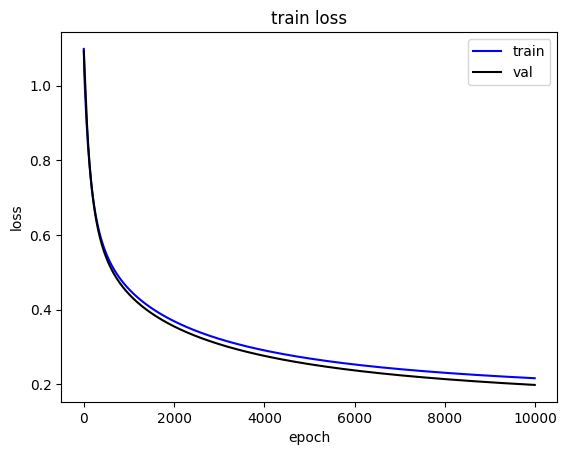

In [77]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b', label='train')
plt.plot(history[:,0], history[:,3], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('train loss')
plt.legend()
plt.show()

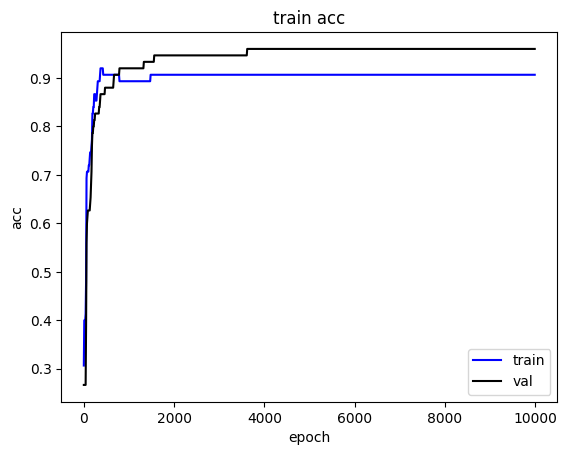

In [78]:
# 학습 곡선 출력(정확도)

plt.plot(history[:,0], history[:,2], 'b', label='train')
plt.plot(history[:,0], history[:,4], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('train acc')
plt.legend()
plt.show()

In [96]:
print('- 정답 데이터의 0,2,3번째 값')
print(labels[[0,2,3]]) # 정답 데이터의 0,2,3번째 값 
print('\n')

print('- 위의 값에 해당하는 입력 값')
i3 = inputs[[0,2,3],:]
print(i3.data.numpy()) # 위의 값에 해당하는 입력 값 추출 
print('\n')

softmax = torch.nn.Softmax(dim=1)
o3 = net(i3)
k3 = softmax(o3)
print('- 선형 함수의 출력 결과')
print(o3.data.numpy()) # 선형 함수의 출력 결과
print('\n')

print('- SoftMax 로부터 얻은 확률 값')
print(k3.data.numpy()) # softmax 로 부터 얻은 확률 값 

- 정답 데이터의 0,2,3번째 값
tensor([1, 0, 2])


- 위의 값에 해당하는 입력 값
[[6.3 4.7]
 [5.  1.6]
 [6.4 5.6]]


- 선형 함수의 출력 결과
[[ 8.807078  14.193761  12.99858  ]
 [12.82624    9.800002   0.1734434]
 [ 6.7954206 15.092816  17.111115 ]]


- SoftMax 로부터 얻은 확률 값
[[3.5014078e-03 7.6497841e-01 2.3152010e-01]
 [9.5374250e-01 4.6254385e-02 3.0506453e-06]
 [2.9224961e-05 1.1729165e-01 8.8267910e-01]]


활성화 함수 / Relu 함수 

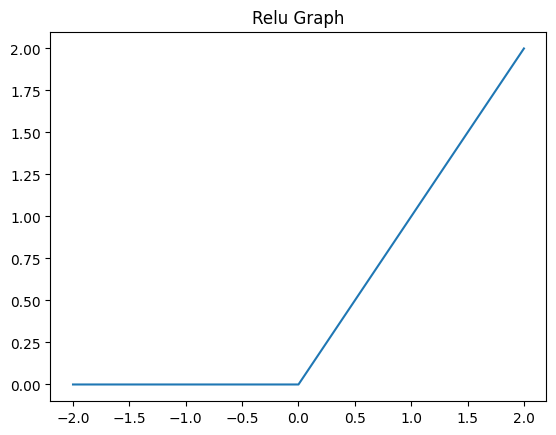

In [97]:
## RELU의 함수 그래프 

relu = nn.ReLU()
x_np = np.arange(-2,2.1,0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('Relu Graph')
plt.show()